In [1]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession


In [2]:
#Truy cập vào master của cụm tại địa chỉ 172.19.0.4:7077 với tên chương trình là Stock_price_analysis
spark = SparkSession.builder.master("spark://172.20.0.8:7077").appName("Gold").getOrCreate()

In [3]:
csvFile = spark.read.format("csv")\
.option("header", "true")\
.option("inferSchema", "true")\
.load("hdfs://namenode:9000/gold/gold.csv")

In [6]:
csvFile.printSchema()


root
 |-- Date: string (nullable = true)
 |-- US_dollar: double (nullable = true)
 |-- Euro: double (nullable = true)
 |-- Japanese_yen: double (nullable = true)
 |-- Vietnamese_dong: double (nullable = true)
 |-- Korean_won: double (nullable = true)



In [5]:
csvFile.count()

10941

In [5]:
csvFile.show()

+----------+---------+-----+------------+---------------+----------+
|      Date|US_dollar| Euro|Japanese_yen|Vietnamese_dong|Korean_won|
+----------+---------+-----+------------+---------------+----------+
|1978-12-29|    226.0|137.1|         0.0|            0.0|       0.0|
|1979-01-01|    226.0|137.1|         0.0|            0.0|       0.0|
|1979-01-02|    226.8|137.3|     43164.9|            0.0|  107470.0|
|1979-01-03|    218.6|134.0|     43717.9|            0.0|  108027.4|
|1979-01-04|    223.2|136.8|     43674.9|            0.0|  108602.5|
|1979-01-05|    225.5|138.4|     44582.5|            0.0|  110510.4|
|1979-01-08|    223.1|136.4|     44436.2|            0.0|  110356.3|
|1979-01-09|    224.0|137.3|     44045.6|            0.0|  109248.4|
|1979-01-10|    220.7|135.5|     43366.4|            0.0|  108108.3|
|1979-01-11|    220.7|135.9|     43770.6|            0.0|  108771.7|
|1979-01-12|    217.6|134.1|     42837.1|            0.0|  106856.6|
|1979-01-15|    216.9|133.8|     4

In [9]:
df = csvFile.toPandas()


Text(0.5, 1.0, 'Giá vàng tại Mỹ')

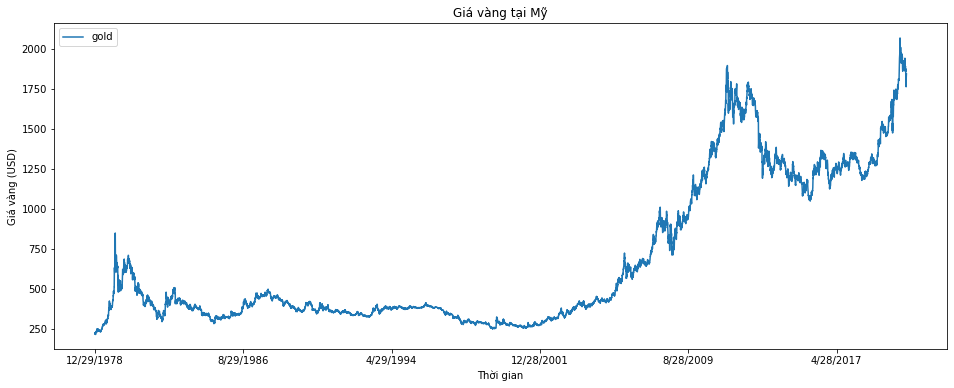

In [11]:
import matplotlib.pyplot as plt

df.plot(x='Date', y= 'US_dollar', label='gold', figsize=(16,6))
plt.ylabel('Giá vàng (USD)')
plt.xlabel('Thời gian')
plt.title('Giá vàng tại Mỹ')

Text(0.5, 1.0, 'Giá vàng tại Việt Nam')

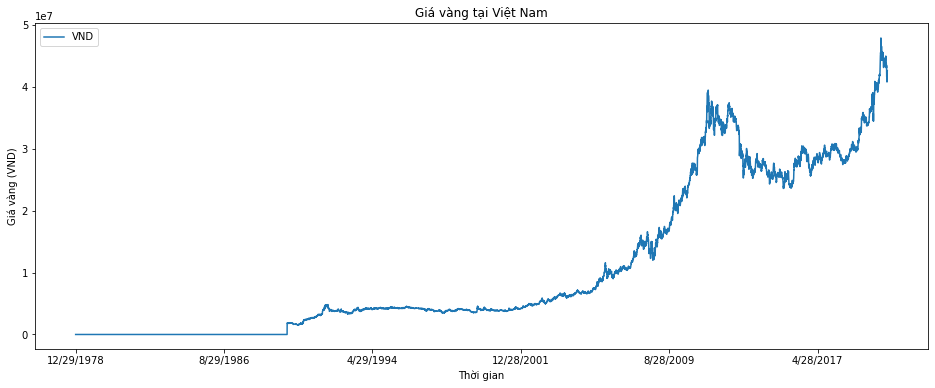

In [13]:
df.plot(x='Date', y= 'Vietnamese_dong', label='VND', figsize=(16,6))
plt.ylabel('Giá vàng (VND)')
plt.xlabel('Thời gian')
plt.title('Giá vàng tại Việt Nam')

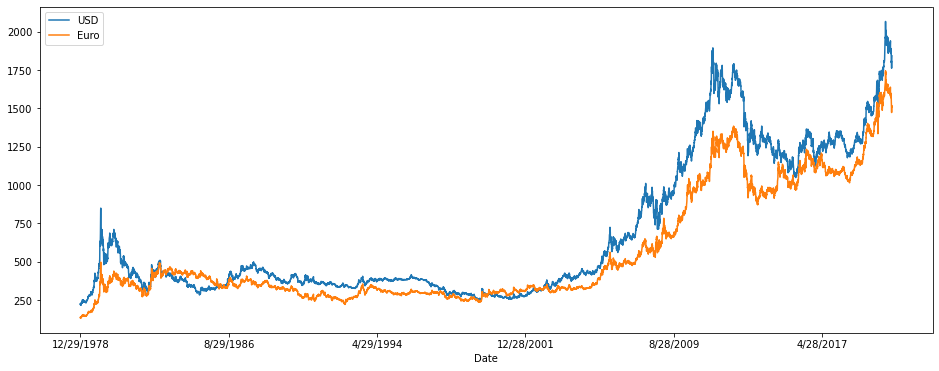

In [12]:
ax = df.plot(x='Date', y= 'US_dollar', label='USD', figsize=(16,6))
ax = df.plot(ax=ax, x= 'Date', y= 'Euro',label='Euro')

In [9]:
from pyspark.sql.functions import year
df_test = csvFile.filter(year("Date") > 2016) #tách ra tập test là tập gồm thông tin của năm 2020

In [10]:
df_test.show(5)

+----------+---------+------+------------+---------------+----------+
|      Date|US_dollar|  Euro|Japanese_yen|Vietnamese_dong|Korean_won|
+----------+---------+------+------------+---------------+----------+
|2017-01-02|   1145.9|1086.4|    133652.0|    2.6093286E7| 1384017.8|
|2017-01-03|   1151.0|1108.4|    135846.8|    2.6182372E7| 1385285.8|
|2017-01-04|   1164.3|1111.4|    136537.4|    2.6460492E7| 1404492.8|
|2017-01-05|   1176.7|1110.0|    135955.9|    2.6687554E7| 1395977.8|
|2017-01-06|   1175.9|1111.7|    136963.0|    2.6530112E7| 1402730.0|
+----------+---------+------+------------+---------------+----------+
only showing top 5 rows



In [11]:
df_train = csvFile.subtract(df_test)   #tách ra tập train
df_train.count()

9916